# Data cleaning
Warning = the code assumes that you have a dataset in a CSV file format. You can modify the code according to your specific data format (e.g., Excel, JSON, etc.).

## Data Inspection

The first step is to inspect the dataset to get a better understanding of its structure, variables, and any potential issues. This includes checking the data types of each variable, identifying missing values or placeholders, and examining potential outliers or inconsistencies.

In [ ]:
import pandas as pd

#1 Load the dataset
data = pd.read_csv('your_dataset.csv')  # Replace 'your_dataset.csv' with your actual dataset file name or path

#2 Display the first few rows of the dataset
print("Preview of the dataset:")
print(data.head())

#3 Get the dimensions of the dataset (number of rows, number of columns)
print("\nDataset dimensions:")
print(data.shape)

#4 Get information about the columns (data types, non-null values)
print("\nColumn information:")
print(data.info())

#5 Get summary statistics of the numerical columns
print("\nSummary statistics:")
print(data.describe())

#6 Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

#7 Check for duplicate rows
print("\nDuplicate rows:")
print(data.duplicated().sum())

## Handling Missing Data


Missing data refers to the absence of values in the dataset. Missing data can be problematic because it can lead to biased or incomplete analysis. There are several techniques to handle missing data, such as:

### Deleting instances or features
If themissing values are few and randomly distributed, you may choose to delete the instances or features with missing values. However, this should be done cautiously to avoid losing important information.

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('your_dataset.csv')  # Replace 'your_dataset.csv' with your actual dataset file name or path

# Delete instances with missing values
data_without_missing = data.dropna()

# Display the updated dataset
print(data_without_missing.head())

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv(
    'your_dataset.csv'
)  # Replace 'your_dataset.csv' with your actual dataset file name or path

# Delete specific features (columns)
features_to_delete = [
    'feature1', 'feature2'
]  # Replace 'feature1', 'feature2', etc., with the actual column names to delete
data_without_features = data.drop(features_to_delete, axis=1)

# Display the updated dataset
print(data_without_features.head())

### Imputation:

Imputation methods are techniques used to fill in missing values in a dataset. Handling missing data is crucial as many machine learning algorithms cannot handle missing values.

titles of various imputation methods commonly used for handling missing data:

1. Mean/Median imputation
2. Mode imputation
3. Regression imputation
4. K-Nearest Neighbors (KNN) imputation
5. Multiple Imputation by Chained Equations (MICE)
6. Hot-Deck imputation
7. Domain-specific imputation

These are some of the popular imputation methods used to fill in missing values in datasets. Each method has its own assumptions, advantages, and limitations, so it's important to choose the most appropriate method based on the characteristics of the data and the specific analysis or modeling task.

#### Mean/Median imputation:

   - Use case: This method replaces missing values with the mean or median value of the corresponding feature. It is suitable for numerical features with no significant outliers.
   - Pros: It is simple to implement and does not distort the feature's distribution.
   - Cons: Mean/median imputation ignores any relationships or patterns in the data, potentially underestimating the variability of the imputed feature.

In [ ]:
#Mean Imputation:

import pandas as pd

# Load the dataset
data = pd.read_csv(
    'your_dataset.csv'
)  # Replace 'your_dataset.csv' with your actual dataset file name or path

# Perform mean imputation
mean_imputed_data = data.fillna(data.mean())

# Display the updated dataset
print(mean_imputed_data.head())

In [ ]:
#Median Imputation:

import pandas as pd

# Load the dataset
data = pd.read_csv('your_dataset.csv')  # Replace 'your_dataset.csv' with your actual dataset file name or path

# Perform median imputation
median_imputed_data = data.fillna(data.median())

# Display the updated dataset
print(median_imputed_data.head())

#### Mode imputation:
   - Use case: Mode imputation replaces missing categorical values with the most frequent category in the feature. It is suitable for categorical features or numerical features that can be discretized into categories.
   - Pros: It is straightforward and effective for handling categorical missing values.
   - Cons: Mode imputation may introduce bias if the most frequent category is overrepresented.
   

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('your_dataset.csv')  # Replace 'your_dataset.csv' with your actual dataset file name or path

# Perform mode imputation
mode_imputed_data = data.fillna(data.mode().iloc[0])

# Display the updated dataset
print(mode_imputed_data.head())

''''The mode() function is used to calculate the mode for each column, and the .\
niloc[0] is used to select the first mode if there are multiple modes.''''''

#### Regression imputation

   - Use case: Regression-based imputation predicts missing values using other features as predictors. It is suitable when there is a correlation between the missing feature and other features.
   - Pros: It captures relationships between variables and can provide good imputations if the correlation is strong.
   - Cons: Regression imputation assumes a linear relationship and may produce inaccurate results if the relationship is nonlinear or complex.
   
**warning: is Regression imputation used for classification tasks?**

Regression imputation is primarily used for imputing missing values in numerical features. It estimates the missing values by fitting a regression model using other features as predictors. While regression imputation can be applied in various contexts, including classification tasks,

**it is typically more commonly used for regression tasks where the target variable is continuous.**

In classification tasks, where the target variable is categorical, other imputation methods such as mode imputation or hot-deck imputation are often preferred. These methods are better suited for handling categorical variables and maintaining the integrity of the class distribution.

However, if you have numerical features with missing values in a classification task and believe that regression imputation could capture meaningful relationships between features, you can still consider using regression imputation. It's important to assess the impact of the imputation method on the classification performance and evaluate if it aligns with the characteristics of your data and the requirements of your classification task.

**Atention:**
the tilde (~) operator is used as a logical NOT operator in the context of boolean indexing.
~ negates the boolean mask, flipping True values to False and vice versa. So, it effectively selects the rows where the feature does not have missing values.
~X[feature_with_missing_values].isnull() creates a boolean mask that is True for the rows where the feature does not have missing values and False for the rows with missing values.

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv('your_dataset.csv')  # Replace 'your_dataset.csv' with your actual dataset file name or path

# Split the dataset into features and target
X = data.drop('target_variable', axis=1)  # Replace 'target_variable' with the name of your target variable column
y = data['target_variable']

# Identify the feature(s) with missing values
feature_with_missing_values = 'feature_name'  # Replace 'feature_name' with the name of the feature with missing values

# Split the data into two sets: with and without missing values in the feature
X_known = X[~X[feature_with_missing_values].isnull()]
X_unknown = X[X[feature_with_missing_values].isnull()]
y_known = y[~X[feature_with_missing_values].isnull()]

# Fit a regression model
regressor = LinearRegression()
regressor.fit(X_known, y_known)

# Predict the missing values
imputed_values = regressor.predict(X_unknown)

# Update the dataset with the imputed values
data.loc[X_unknown.index, feature_with_missing_values] = imputed_values

# Display the updated dataset
print(data.head())

#### K-Nearest Neighbors (KNN) imputation:

   - Use case: KNN imputation fills missing values based on the values of the nearest neighbors in the feature space. It is suitable for datasets with multiple features and when the missingness is not completely random.
   
   - Pros: It takes into account the similarities between instances and can handle both numerical and categorical features.
   
   - Cons: KNN imputation can be computationally expensive for large datasets and requires defining the number of neighbors (k). It may also introduce bias if there is a high level of missingness.

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

# Load the dataset
data = pd.read_csv('your_dataset.csv')  # Replace 'your_dataset.csv' with your actual dataset file name or path

# Create a copy of the dataset for imputation
imputed_data = data.copy()

# Identify the feature(s) with missing values
features_with_missing_values = ['feature1', 'feature2']  # Replace with the names of the features with missing values

# Perform KNN imputation
imputer = KNNImputer(n_neighbors=5)  # Set the desired number of neighbors
imputed_data[features_with_missing_values] = imputer.fit_transform(imputed_data[features_with_missing_values])

# Display the updated dataset
print(imputed_data.head())

#### Multiple Imputation by Chained Equations (MICE)
   - Use case: MICE is an iterative imputation method that models each feature with missing values using the other features in the dataset. 
  
   **It is suitable for datasets with complex dependencies between features.**
   
   - Pros: MICE can handle missing values in both numerical and categorical features and preserves the relationships between variables.
   - Cons: MICE can be computationally expensive and may require a larger number of iterations for convergence.

   2min video: https://www.youtube.com/watch?v=zX-pacwVyvU
![Workflow-of-multiple-imputation-by-chained-equations-MICE.png]

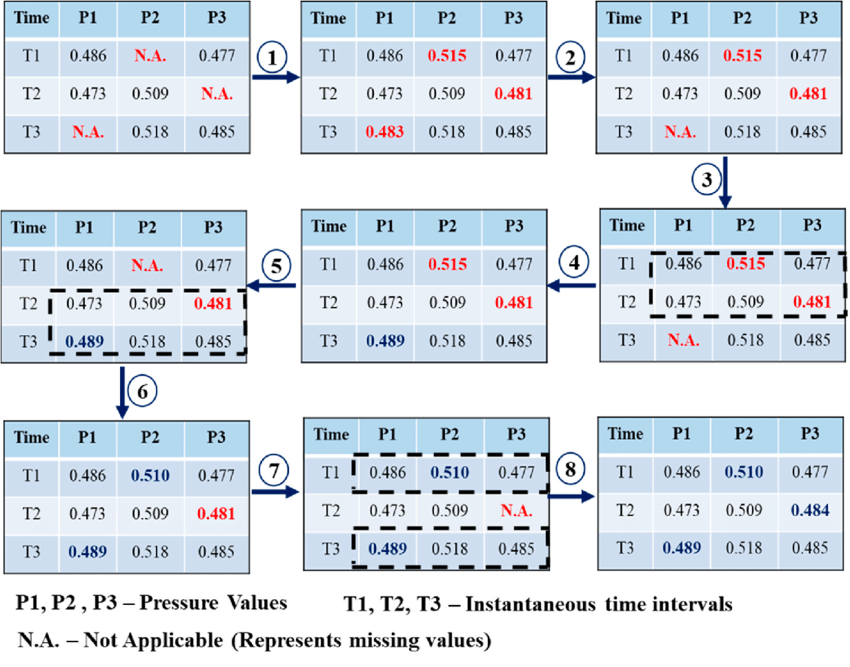

In [ ]:
from fancyimpute import IterativeImputer
import numpy as np

# Example data with missing values
X = np.array([[1, 2, np.nan],
              [4, np.nan, 6],
              [7, 8, 9]])

# Create an instance of the MICE imputer
mice_imputer = IterativeImputer()

# Perform the imputation
X_imputed = mice_imputer.fit_transform(X)

# Print the imputed data
print("Imputed data:")
print(X_imputed)

#### Hot-Deck imputation:
   - Use case: Hot-Deck imputation replaces missing values with values "randomly" selected from similar instances in the dataset. 

   **It is suitable for datasets with similar patterns between instances.**
   
   - Pros: It preserves the relationships between variables and can handle both numerical and categorical features.
   - Cons: Hot-Deck imputation relies on the assumption that similar instances have similar values, which may not always hold true.


   **note: Hot-deck imputation is not supported directly by sklearn and can use KNNimputer. the difference is the hot-deck randomly selects values from the pool of similar observations.**


In [ ]:
import pandas as pd
import numpy as np

# Create a sample dataset with missing values
data = {'A': [1, 2, np.nan, 4, 5],
        'B': [np.nan, 6, 7, np.nan, 9],
        'C': [10, np.nan, 12, 13, 14]}
df = pd.DataFrame(data)

# Function to perform hot-deck imputation
def hot_deck_imputation(df):
    for col in df.columns:
        missing_indices = df[col].isnull()
        num_missing = missing_indices.sum()
        
        if num_missing > 0:
            similar_indices = np.random.choice(df[~missing_indices].index, size=num_missing, replace=True)
            df.loc[missing_indices, col] = df.loc[similar_indices, col].values
    
    return df

# Apply hot-deck imputation on the dataset
imputed_df = hot_deck_imputation(df)

print("Original Dataset:")
print(df)
print("\nImputed Dataset:")
print(imputed_df)


#### Domain-specific imputation:

   - Use case: In some cases, domain-specific knowledge can be used to impute missing values. For example, if missing data relates to time series, seasonal patterns or historical trends could be leveraged for imputation.
   
   - Pros: Domain-specific imputation can provide more accurate imputations based on expert knowledge.
   - Cons: It requires expertise in the specific domain and may not be applicable or effective for all datasets.

The choice of imputation method depends on the nature of the data, the amount and type of missingness, and the specific requirements of the analysis or modeling task. It is essential to consider the potential impact of imputation on the downstream analysis and interpret the results with caution.

## noise handling

Handling noise refers to the process of reducing or removing unwanted variations or random fluctuations in the data, often caused by measurement errors or other sources of interference. Noise can distort the underlying patterns or relationships in the data, making it harder to extract meaningful insights or build accurate models. Therefore, noise reduction techniques are applied to enhance the signal-to-noise ratio and improve the quality of the data. Here are a few common approaches for handling noise:

1. Smoothing:
   - Smoothing techniques involve applying filters or algorithms to remove high-frequency noise components while preserving the overall trend or pattern in the data. Some popular smoothing methods include:
     - Moving Average: A moving average calculates the average of a sliding window of data points, effectively smoothing out short-term fluctuations.
     - Gaussian Smoothing: This technique applies a weighted average to neighboring data points, with weights determined by a Gaussian distribution, to reduce noise.

2. Filtering:
   - Filtering techniques aim to remove unwanted frequencies or noise components from the data while preserving the desired signal. Different types of filters can be used depending on the characteristics of the noise and the data. Some common filtering methods include:
     - Low-pass Filter: A low-pass filter allows low-frequency components to pass through while attenuating high-frequency noise.
     - High-pass Filter: A high-pass filter allows high-frequency components to pass through while attenuating low-frequency noise.
     - Band-pass Filter: A band-pass filter allows a specific range of frequencies to pass through while attenuating frequencies outside that range.

3. Outlier Detection and Removal:
   - Outliers are data points that significantly deviate from the expected or typical patterns. Outliers can be considered as noise and may need to be handled or removed. Outlier detection techniques, such as statistical methods (e.g., z-score or modified z-score) or distance-based methods (e.g., Mahalanobis distance), can help identify and remove outliers from the data.

4. Signal Averaging:
   - Signal averaging is a technique that involves combining multiple measurements of the same phenomenon to reduce random noise. By averaging multiple observations, the random fluctuations tend to cancel out, while the desired signal is enhanced.

5. Data Interpolation or Extrapolation:
   - In some cases, missing or noisy data points can be estimated or replaced using interpolation or extrapolation techniques. These methods use the surrounding data points to infer the missing or noisy values based on the underlying patterns or relationships.

6. Data Normalization or Standardization:
   - Scaling or normalizing the data can also help in handling noise. By bringing the data onto a similar scale, the impact of noise can be reduced, making it easier to identify and analyze the underlying patterns.

It's important to note that the choice of noise reduction technique depends on the nature of the noise, the characteristics of the data, and the specific requirements of the analysis or modeling task. It's often a balance between preserving the essential information and removing unwanted noise to improve the accuracy and reliability of the data.

## Handling Outliers:

Outliers are extreme values that deviate significantly from the bulk of the data. Outliers can skew the analysis or modeling results and should be addressed. Techniques for handling outliers include:

 1. Deleting outliers: In some cases, outliers can be removed from the dataset if they are considered as erroneous or irrelevant data points. However, this should be done judiciously and with a clear understanding of the data and the problem being addressed.

 2. Transforming outliers: Outliers can be transformed using statistical techniques such as winsorization or log-transformation to reduce their impact or make them conform more closely to the rest of the data.

 3. Treating outliers separately: In certain cases, it may be appropriate to treat outliers as a distinct group or category and analyze them separately from the rest of the data.

## Handling Inconsistent Data:

Inconsistent data refers to data that violates logical rules or constraints. This can include contradictory values, formatting errors, or data that does not adhere to predefined rules. Techniques for handling inconsistent data include:

 1. Standardizing formats: Ensuring consistent formatting (e.g., date formats, numeric formats) across the dataset.

 2. Correcting errors: Identifying and correcting typographical errors or inconsistencies in the data, such as misspellings or incorrect values.

 3. Validating data against established rules: Checking the data against predefined rules or constraints to identify any inconsistencies or violations.

# Data Transformation

## Scaling or normalization
is a common data transformation technique used to bring different features onto a similar scale. Let's take an example of scaling numerical features using Min-Max scaling, which scales the values between a specified range (typically 0 and 1). Here's how you can perform scaling using Python and the scikit-learn library:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Sample data with two numerical features
data = np.array([[10, 20],
                 [30, 40],
                 [50, 60]])

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the data and transform it
scaled_data = scaler.fit_transform(data)

print("Original Data:\n", data)
print("\nScaled Data:\n", scaled_data)

## Logarithmic Transformation:
When data is highly skewed or has a wide range, applying a logarithmic transformation can compress the data and make it more symmetrical. This transformation is useful when dealing with variables that have exponential or power-law relationships.

**attention : Remmeber in the first step of data preprossesing we used methods like summary and etr, becuase we wanted to understand for example we should use a Logarithmic Transformation for a column or not**

In [ ]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

# Sample data with skewed values
data = np.array([1, 10, 100, 1000])

# Create a logarithmic transformer
log_transformer = FunctionTransformer(np.log1p, validate=True)

# Apply logarithmic transformation
transformed_data = log_transformer.transform(data.reshape(-1, 1))

print("Original Data:", data)
print("Transformed Data:", transformed_data.flatten())

## Power Transformation
Power transformations, such as Box-Cox or Yeo-Johnson, are used to reduce the skewness of data and make it conform more closely to a normal distribution. These transformations are beneficial when working with variables that have long tails or exhibit a non-linear relationship with the target variable.

In [ ]:
import numpy as np
from scipy import stats

# Sample data with positive values
data = np.array([1, 10, 100, 1000])

# Perform Box-Cox transformation
transformed_data, lambda_value = stats.boxcox(data)

print("Original Data:", data)
print("Transformed Data:", transformed_data)
print("Lambda value:", lambda_value)


"""The lambda value indicates the power transformation applied. If the lambda value is close to 0, 
it suggests a logarithmic transformation."""

## Binning
Binning involves grouping continuous values into discrete intervals or categories. This can be useful for simplifying the data representation, handling non-linear relationships, or converting numerical variables into categorical ones. Binning can be done using equal-width intervals, equal-frequency intervals, or domain-specific criteria.

**attention: consider one-hot encoding after binning**

In [ ]:
import pandas as pd

# Sample data
data = pd.DataFrame({'Age': [22, 35, 42, 28, 55, 68, 38, 19, 60, 32]})

# Define the bin edges
bin_edges = [0, 20, 40, 60, 100]

# Perform binning
data['Age Group'] = pd.cut(data['Age'], bins=bin_edges, labels=['<20', '20-40', '40-60', '60+'])

print(data)

## Encoding Categorical Variables
Categorical variables need to be transformed into numerical representations for many machine learning algorithms. Common techniques include one-hot encoding, which creates binary variables for each category, and label encoding, which assigns a unique numerical label to each category.

### One-Hot Encoding:
To perform one-hot encoding, we use the pd.get_dummies() function on the 'Color' column. This function creates separate binary columns for each unique category present in the 'Color' column. Each column represents a category, and a value of 1 indicates the presence of that category for a particular data point.

In [ ]:
import pandas as pd

# Sample data
data = pd.DataFrame({'Color': ['Red', 'Green', 'Blue', 'Red', 'Green', 'Blue']})

# One-hot encoding
one_hot_encoded = pd.get_dummies(data['Color'])

print("One-Hot Encoded:")
print(one_hot_encoded)
print()


### Label Encoding:
To perform label encoding, we use the astype('category').cat.codes approach. We first convert the 'Color' column to the 'category' data type and then use the cat.codes attribute to assign a numerical code to each unique category. Each category is mapped to a numerical value, starting from 0.

In [ ]:

# Label encoding
label_encoded = data['Color'].astype('category').cat.codes

print("Label Encoded:")
print(label_encoded)

### How to choose between one-hot and lable encoding

The choice between one-hot encoding and label encoding depends on the nature of the categorical variable and the specific requirements of your analysis or machine learning model. Here are some guidelines to help you decide when to use each encoding method:

**One-Hot Encoding:**
- Use one-hot encoding when the categorical variable does not have an inherent order or hierarchy. One-hot encoding creates separate binary columns for each category, representing the presence or absence of that category for each data point.
- One-hot encoding is suitable when the number of unique categories is relatively small, as it can result in a high-dimensional feature space when there are many categories.
- One-hot encoding is commonly used when applying machine learning algorithms that do not assume any ordinal relationship between the categories, such as decision trees, random forests, or neural networks.

**Label Encoding:**
- Use label encoding when the categorical variable has an ordinal relationship or an inherent order. Label encoding assigns a numerical label to each category, representing the order or rank of the category.
- Label encoding can be suitable when the number of unique categories is large, as it avoids creating a high-dimensional feature space like one-hot encoding.
- Label encoding is commonly used when applying machine learning algorithms that can leverage the ordinal relationship between categories, such as linear regression, support vector machines, or gradient boosting algorithms.

It's important to note that some machine learning algorithms may interpret label-encoded variables as having a meaningful order, even if the original data had no inherent order. In such cases, one-hot encoding might be preferred to avoid introducing unintended relationships between categories.

In summary, one-hot encoding is generally preferred for unordered categorical variables, while label encoding can be suitable for ordered categorical variables. Consider the characteristics of your data, the nature of the categorical variable, and the requirements of your analysis or machine learning model to make an informed decision on which encoding method to use.

## Polynomial Transformation
Polynomial transformation involves creating new features by raising existing features to various powers. This is helpful in capturing non-linear relationships between variables and can improve the performance of models that assume linear relationships.

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# Sample data
X = np.array([1, 2, 3]).reshape(-1, 1)

# Perform polynomial transformation
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

print("Original Features:")
print(X)
print()

print("Polynomial Features:")
print(X_poly)

### what is the use case for Polynomial Transformation?

***key words = capturing non-linear relationships between features***

Polynomial transformation is useful in various data analysis and machine learning scenarios where capturing non-linear relationships between variables is important. Here are some common use cases for polynomial transformation:

1. **Regression Analysis**: In regression analysis, polynomial transformation can help capture non-linear relationships between the independent variables (features) and the dependent variable (target). By introducing polynomial features, the regression model can better fit curved or non-linear patterns in the data.

2. **Feature Engineering**: Polynomial transformation can be used as a feature engineering technique to create new features that capture complex interactions between variables. It allows you to introduce higher-order terms and interaction terms, which can be valuable in improving the performance of machine learning models.

3. **Data Visualization**: Polynomial transformation can be useful for visualizing data in higher-dimensional spaces. By transforming the original features into polynomial features, you can create new axes that reveal non-linear patterns and relationships, making it easier to visualize and interpret the data.

4. **Decision Boundaries**: In classification problems, polynomial transformation can help capture non-linear decision boundaries between classes. By introducing polynomial features, you can enable a linear classifier to learn more complex decision boundaries, improving the model's ability to separate different classes in the feature space.

5. **Time Series Analysis**: Polynomial transformation can be applied to time series data to capture non-linear trends and seasonality patterns. By introducing polynomial features, you can model and forecast time series data that exhibit non-linear behavior.

It's important to note that the use of polynomial transformation should be guided by the specific characteristics of your data and the problem you are trying to solve. While polynomial transformation can be effective in capturing non-linear relationships, it can also introduce complexity and potential overfitting, especially with higher degrees of polynomials. Careful experimentation and validation are necessary to determine the optimal degree of polynomial transformation for your specific use case.

# Feature Selection
Feature selection is a process of selecting a subset of relevant features from a larger set of available features in a dataset. It aims to improve model performance, reduce complexity, and mitigate the risk of overfitting.

## Removing Irrelevant Features

### Variance Thresholding:

****it is usually used for continuous features****

 - This approach is based on the idea that features with low variance across the dataset may not contain much useful information for the prediction task.
 - Calculate the variance of each feature and remove those with variances below a certain threshold.
   Features with low variance are likely to have constant or near-constant values, indicating little variability, and thus may not contribute significantly to the model.

 - This technique is useful for continuous features but may not be suitable for categorical features without appropriate encoding.

In [ ]:
import numpy as np
import pandas as pd

# Load the dataset
data = pd.read_csv('your_dataset.csv')

# Calculate feature variances
variances = data.var()

# Set a threshold for low variance
threshold = 0.1

# Identify low-variance features
low_variance_features = variances[variances <= threshold].index.tolist()

# Remove irrelevant features
data_filtered = data.drop(low_variance_features, axis=1)

### Univariate Feature Selection
   - Univariate feature selection methods evaluate the relationship between each feature and the target variable independently.
   - Common statistical tests, such as chi-square test for categorical targets or ANOVA/F-test for continuous targets, can be used to assess the significance of each feature.
   - Features with low statistical scores or p-values above a predetermined threshold are considered less relevant and can be removed.
   - Univariate feature selection is straightforward to implement and provides a quick way to eliminate features that have weak associations with the target variable.

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd

# Load the dataset
data = pd.read_csv('your_dataset.csv')

# Separate the features and the target variable
X = data.drop('target', axis=1)  # Features (excluding the target)
y = data['target']  # Target variable

# Perform univariate feature selection
k = 10  # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)  # Use chi-square test as the scoring function
X_new = selector.fit_transform(X, y)  # Select the top k features

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

# Create a new dataframe with the selected features
data_selected = data[selected_features]

### Correlation Analysis
   - Correlation analysis examines the linear relationship between features and the target variable or between different features themselves.
   - Features that have a weak correlation with the target or are highly correlated with other features may be less informative or redundant.
   - Calculate the correlation coefficients (e.g., Pearson's correlation) between each feature and the target and/or between pairs of features.
   - Features with low correlation coefficients or high inter-feature correlations above a certain threshold can be considered less relevant and removed.
   - Be cautious with multicollinearity, as highly correlated features may still be individually important.

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('your_dataset.csv')

# Compute the correlation matrix
corr_matrix = data.corr()

# Set a correlation threshold
threshold = 0.7

# Find highly correlated features
highly_correlated_features = np.where(np.abs(corr_matrix) > threshold)

# Get the indices of the highly correlated features
correlated_feature_indices = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*highly_correlated_features) if x != y and x < y]

# Print the highly correlated features
for feature1, feature2 in correlated_feature_indices:
    print(f"{feature1} and {feature2} are highly correlated.")

## Feature Importance Ranking
   - This approach ranks features based on their importance or contribution to the predictive model.
   - Techniques like Random Forest, Gradient Boosting, or Extra Trees can be used to estimate feature importance.
   - These methods assign importance scores to each feature based on how much they contribute to reducing the prediction error.
   - Features with low importance scores can be considered less relevant and removed from the dataset.
   - Feature importance ranking is particularly useful for tree-based models but can be applied to other algorithms as well.

Feature Importance Ranking methods are used to assess the importance or contribution of each feature in a dataset towards the predictive model's performance. These methods assign importance scores or ranks to features, indicating their relative significance in making accurate predictions. Here are explanations of three commonly used Feature Importance Ranking methods:

### Tree-Based Methods
   - Tree-based models, such as Random Forest and Gradient Boosting, offer a built-in feature importance mechanism.
   - These methods calculate feature importance based on how much each feature reduces the impurity or error in the model's predictions.
   - The importance of a feature is computed by aggregating its impact across all decision trees in the ensemble model.
   - Typically, the higher the importance score, the more influential the feature is in making accurate predictions.
   - Tree-based feature importance is useful for identifying the most informative features in the dataset, especially in the context of decision tree-based models.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Load the dataset
data = pd.read_csv('your_dataset.csv')

# Separate the features and the target variable
X = data.drop('target', axis=1)  # Features (excluding the target)
y = data['target']  # Target variable

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Fit the classifier to the data
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a dataframe with feature names and importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by importance
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Print the feature importances
print(feature_importances)

### Permutation Importance
   - Permutation Importance is a model-agnostic method that measures feature importance by evaluating the model's performance when individual features are randomly shuffled.
   - The idea is to assess the drop in model performance when a feature's values are randomly permuted, indicating the importance of that feature in the original model.
   - By permuting each feature independently and measuring the resulting performance decrease, a permutation importance score can be calculated for each feature.
   - Permutation Importance is beneficial when you want to assess feature importance for any type of model, regardless of its underlying algorithm.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import pandas as pd

# Load the dataset
data = pd.read_csv('your_dataset.csv')

# Separate the features and the target variable
X = data.drop('target', axis=1)  # Features (excluding the target)
y = data['target']  # Target variable

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Fit the classifier to the data
rf.fit(X, y)

# Perform permutation importance
result = permutation_importance(rf, X, y, n_repeats=10, random_state=42)

# Get feature importances
importances = result.importances_mean

# Create a dataframe with feature names and importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by importance
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Print the feature importances
print(feature_importances)

### L1 Regularization (Lasso)
   - L1 regularization, often used in linear models like Linear Regression or Logistic Regression, encourages sparsity in feature coefficients.
   - By applying L1 regularization, the model tends to push the coefficients of irrelevant features towards zero.
   - Features with non-zero coefficients after regularization are considered important since they contribute significantly to the model's predictions.
   - The magnitude of the non-zero coefficients can be used as a measure of feature importance.
   - **L1 regularization is advantageous when interpretability and feature selection are key concerns.**

These feature importance ranking methods provide valuable insights into the relevance of features for predictive modeling. They guide feature selection, help identify key variables, and can improve understanding of the underlying data relationships. It's important to note that different methods may yield different importance rankings, and the choice of the method should be based on the specific problem, model, and data characteristics.

In [ ]:
from sklearn.linear_model import Lasso
import pandas as pd

# Load the dataset
data = pd.read_csv('your_dataset.csv')

# Separate the features and the target variable
X = data.drop('target', axis=1)  # Features (excluding the target)
y = data['target']  # Target variable

# Create a Lasso model
lasso = Lasso(alpha=0.1)  # Adjust the alpha value as needed

# Fit the Lasso model to the data
lasso.fit(X, y)

# Get feature importances (coefficients)
importances = lasso.coef_

# Create a dataframe with feature names and importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by importance
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Print the feature importances
print(feature_importances)

## Dimensionality reduction

Dimensionality reduction techniques are methods used to reduce the number of features or variables in a dataset while preserving or capturing the most important information.
****These techniques are particularly useful when dealing with high-dimensional data, where the number of features is much larger than the number of samples, as they can help alleviate the curse of dimensionality and improve computational efficiency.****

Here's a list of commonly used dimensionality reduction techniques:

1. Principal Component Analysis (PCA)
2. Linear Discriminant Analysis (LDA)
3. t-Distributed Stochastic Neighbor Embedding (t-SNE)
4. Isomap
5. Locally Linear Embedding (LLE)
6. Laplacian Eigenmaps
7. Autoencoders
8. Independent Component Analysis (ICA)
9. Random Projection
10. Non-negative Matrix Factorization (NMF)
11. Sparse Principal Component Analysis (Sparse PCA)
12. Factor Analysis
13. Multidimensional Scaling (MDS)
14. Neighborhood Components Analysis (NCA)
15. Kernel PCA
16. Incremental PCA
17. Robust Principal Component Analysis (Robust PCA)
18. Deep Belief Networks (DBN)
19. Quadratic Discriminant Analysis (QDA)
20. Stacked Denoising Autoencoders
21. Curvilinear Component Analysis (CCA)
22. Maximum Variance Unfolding (MVU)
23. Feature Agglomeration
24. Dictionary Learning
25. Partial Least Squares (PLS)

This list covers a range of techniques, including both linear and non-linear methods, unsupervised and supervised approaches, and a variety of algorithms. Each technique has its own assumptions, strengths, and limitations, so it's important to choose the appropriate technique based on the specific characteristics of your dataset and the goals of your analysis.

### Principal Component Analysis (PCA):
   PCA is a linear dimensionality reduction technique that identifies the directions (principal components) in the feature space along which the data varies the most. The goal is to transform the original features into a new set of uncorrelated variables called principal components. The first principal component captures the largest amount of variance in the data, followed by the subsequent components in descending order. By selecting a subset of the principal components or projecting the data onto a lower-dimensional space, PCA effectively reduces the dimensionality of the dataset.

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

# Load the dataset
data = pd.read_csv('your_dataset.csv')

# Separate the features and the target variable
X = data.drop('target', axis=1)  # Features (excluding the target)
y = data['target']  # Target variable

# Create a PCA object with the desired number of components
n_components = 2  # Adjust the number of components as needed
pca = PCA(n_components=n_components)

# Fit the PCA model to the data
pca.fit(X)

# Transform the data to the lower-dimensional space
X_pca = pca.transform(X)

# Create a new dataframe with the principal components
columns = [f'PC{i+1}' for i in range(n_components)]
df_pca = pd.DataFrame(data=X_pca, columns=columns)

# Print the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)

# Print the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)
print("Cumulative explained variance:", cumulative_variance)

# Print the principal components' loadings (coefficients)
loadings = pd.DataFrame(data=pca.components_.T, columns=columns, index=X.columns)
print("Principal components loadings:")
print(loadings)

### t-Distributed Stochastic Neighbor Embedding (t-SNE):
   t-SNE is a non-linear dimensionality reduction technique that focuses on preserving the local structure of the data. It is particularly useful for visualizing high-dimensional data in two or three dimensions. t-SNE constructs a probability distribution over pairs of high-dimensional data points and a similar distribution over the corresponding points in the low-dimensional representation. It minimizes the divergence between these two distributions to find a lower-dimensional embedding that maintains the neighborhood relationships of the original data points. t-SNE is often used for exploratory data analysis and clustering visualization.


In [ ]:
from sklearn.manifold import TSNE
import pandas as pd

# Load the dataset
data = pd.read_csv('your_dataset.csv')

# Separate the features and the target variable
X = data.drop('target', axis=1)  # Features (excluding the target)
y = data['target']  # Target variable

# Create a t-SNE object with the desired number of components
n_components = 2  # Adjust the number of components as needed
tsne = TSNE(n_components=n_components)

# Transform the data to the lower-dimensional space
X_tsne = tsne.fit_transform(X)

# Create a new dataframe with the t-SNE components
columns = [f'Component{i+1}' for i in range(n_components)]
df_tsne = pd.DataFrame(data=X_tsne, columns=columns)

# Print the t-SNE components
print(df_tsne)

# Handling Imbalanced Data

Handling imbalanced data is a common challenge in machine learning, where the number of samples in one class is significantly higher or lower than the other classes. Imbalanced data can lead to biased models that favor the majority class and have poor performance on the minority class. Here are some techniques to address imbalanced data:

## Resampling Techniques:
   - Oversampling: Increase the number of instances in the minority class by randomly replicating samples or generating synthetic data points using techniques like Synthetic Minority Over-sampling Technique (SMOTE) or Adaptive Synthetic (ADASYN).
   - Undersampling: Reduce the number of instances in the majority class by randomly removing samples or selecting a subset of samples from the majority class.

### Oversampling:
   Oversampling involves increasing the number of instances in the minority class to match the majority class. Here are a few commonly used oversampling methods:

#### Random Oversampling
Randomly duplicates instances from the minority class until it reaches a desired balance. This technique can lead to overfitting if the same instances are replicated too frequently.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# X: Features, y: Target variable
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Check the class distribution after oversampling
unique, counts = np.unique(y_resampled, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class Distribution after Random Oversampling: ", class_distribution)

#### Synthetic Minority Over-sampling Technique (SMOTE)
Synthetic Minority Over-sampling Technique (SMOTE) is an oversampling method commonly used to address class imbalance in machine learning tasks. It aims to increase the number of instances in the minority class by generating synthetic samples based on the existing minority samples.

In [ ]:
from imblearn.over_sampling import SMOTE

# X: Features, y: Target variable
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after SMOTE
unique, counts = np.unique(y_resampled, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class Distribution after SMOTE: ", class_distribution)

#### Adaptive Synthetic (ADASYN)
Adaptive Synthetic Sampling (ADASYN) is an extension of the Synthetic Minority Over-sampling Technique (SMOTE) that aims to overcome one of SMOTE's limitations. SMOTE generates synthetic samples uniformly for the minority class, regardless of the difficulty of learning each instance. ADASYN, on the other hand, adaptively adjusts the generation of synthetic samples based on the level of difficulty in learning different minority instances.

In [ ]:
from imblearn.over_sampling import ADASYN

# X: Features, y: Target variable
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Check the class distribution after ADASYN
unique, counts = np.unique(y_resampled, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class Distribution after ADASYN: ", class_distribution)

*****Attention: check methods bellow later*****

 - Borderline SMOTE:
 
     - Classifies instances in the minority class as safe, borderline, or rare based on their proximity to the majority class.
        Applies SMOTE only to the borderline instances, which are closer to the decision boundary.
        It focuses on the instances that are more challenging to classify and avoids oversampling noisy or well-separated instances.
 


 - SMOTE-ENN:
     - Combines SMOTE and Edited Nearest Neighbors (ENN) undersampling method.It applies SMOTE to oversample the minority class and then applies ENN to remove noisy or misclassified instances from both classes.It aims to create synthetic samples for the minority class while reducing the instances that might cause misclassification.
    
 - SMOTE-Tomek:
     - Combines SMOTE and Tomek Links undersampling method.It applies SMOTE to oversample the minority class and then removes instances from both classes that form Tomek links, which are pairs of instances from different classes that are the nearest neighbors of each other.It aims to create synthetic samples for the minority class while increasing the separation between classes.

 - G-SMOTE:
    - Generates synthetic samples for the minority class by considering the density distribution of instances.It creates synthetic samples in both dense and sparse regions of the minority class, allowing for a more diverse oversampling.


### Undersampling
   Undersampling reduces the number of instances in the majority class to match the minority class. Here are a couple of commonly used undersampling methods:

#### Random Undersampling
Randomly removes instances from the majority class until the desired balance is achieved. This technique may discard useful information and potentially lead to underfitting if the removed instances contain crucial patterns.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification

# Generate a synthetic imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=10, weights=[0.9, 0.1], random_state=42)

# Count the number of instances in each class
unique, counts = np.unique(y, return_counts=True)
print("Class distribution before random undersampling:")
print(dict(zip(unique, counts)))

# Create a RandomUnderSampler object
rus = RandomUnderSampler(random_state=42)

# Perform random undersampling
undersampled_X, undersampled_y = rus.fit_resample(X, y)

# Count the number of instances in each class after undersampling
unique, counts = np.unique(undersampled_y, return_counts=True)
print("Class distribution after random undersampling:")
print(dict(zip(unique, counts)))

#### Tomek Links
Tomek Links are pairs of instances from different classes that are closest to each other. Undersampling based on Tomek Links removes the majority class instance from each pair, making the decision boundary more distinct.

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from imblearn.under_sampling import TomekLinks

# Generate a synthetic imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=10, weights=[0.9, 0.1], random_state=42)

# Count the number of instances in each class
unique, counts = np.unique(y, return_counts=True)
print("Class distribution before Tomek Links undersampling:")
print(dict(zip(unique, counts)))

# Create a TomekLinks object
tl = TomekLinks()

# Perform Tomek Links undersampling
undersampled_X, undersampled_y = tl.fit_resample(X, y)

# Count the number of instances in each class after undersampling
unique, counts = np.unique(undersampled_y, return_counts=True)
print("Class distribution after Tomek Links undersampling:")
print(dict(zip(unique, counts)))

*****Attention: check methods bellow later*****

- Edited Nearest Neighbors (ENN):
   - Classifies instances using their k nearest neighbors.
   - Removes instances from the majority class that are misclassified by their nearest neighbors, as they might be noisy or ambiguous instances.
   - It aims to remove instances that are likely to cause misclassification.

- One-Sided Selection:
   - Combines Tomek Links and ENN.
   - Removes instances from the majority class that are Tomek links or misclassified by their nearest neighbors.
   - It aims to remove ambiguous and noisy instances while preserving the instances that are easier to classify.

- Cluster Centroids:
   - Applies clustering algorithms to the majority class instances and identifies cluster centroids.
   - Removes instances from the majority class by keeping only the cluster centroids.
   - It aims to reduce the redundancy in the majority class instances while maintaining the representative information.

- Neighborhood Cleaning Rule (NCR):
   - Classifies instances using their k nearest neighbors.
   - Removes instances from the majority class that are misclassified by their nearest neighbors and instances that are misclassified by their nearest minority class neighbors.
   - It aims to remove instances that are likely to cause misclassification, considering both majority and minority class neighbors.

Under-sampling methods can help balance the class distribution, reduce the dominance of the majority class, and improve the learning ability of models on the minority class. However, under-sampling can also result in the loss of valuable information from the majority class, which may affect the overall performance of the model. It's important to evaluate the impact of under-sampling on the model's performance and consider other techniques like over-sampling, ensemble methods, or hybrid approaches to address class imbalance effectively.

### Combination Methods
Combination methods involve a combination of oversampling and undersampling techniques.
Combination methods for undersampling and oversampling are techniques that combine both undersampling and oversampling strategies to address class imbalance in a dataset. These methods aim to provide a more balanced representation of the minority and majority classes by removing some instances from the majority class and generating or replicating instances for the minority class.

#### SMOTEENN
SMOTEENN combines SMOTE and Edited Nearest Neighbors (ENN).It oversamples the minority class using SMOTE and then cleans the resulting dataset using ENN, which removes instances misclassified by a classifier.

#### SMOTETomek
SMOTETomek combines SMOTE and Tomek Links. It first oversamples the minority class using SMOTE and then removes instances using Tomek Links.

These resampling techniques help balance the class distribution, allowing machine learning models to learn from the minority class more effectively. However, it's important to note that the choice of resampling technique should be based on the specific dataset and problem at hand, and it's always recommended to evaluate the performance of the model using appropriate evaluation metrics.

*****Attention: check methods bellow later*****

3. SMOTE-ENN (SMOTE + Edited Nearest Neighbors):
   SMOTE-ENN is another combination method that applies SMOTE for oversampling and ENN for undersampling. It generates synthetic instances for the minority class using SMOTE and then removes instances from both classes using ENN similar to SMOTEENN.

4. SMOTE-Tomek (SMOTE + Tomek Links):
   SMOTE-Tomek combines SMOTE for oversampling and Tomek Links for undersampling. It applies SMOTE to generate synthetic instances for the minority class and then removes instances using Tomek Links, which are pairs of instances from different classes that are nearest neighbors and are removed to improve the class separation.

These combination methods aim to address the imbalance issue by effectively combining undersampling and oversampling techniques. By removing redundant and noisy instances from the majority class and generating or replicating instances for the minority class, these methods help achieve a more balanced distribution of classes in the dataset. The specific combination method to choose depends on the characteristics of the dataset and the problem at hand.

## Class Weighting:
   - Assign higher weights to the minority class during model training to increase its importance and prevent the model from being biased towards the majority class. This can be achieved by adjusting the class weights in the loss function or using algorithms that inherently handle class imbalance, such as Balanced Random Forest or Weighted SVM.

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight

# Load dataset (iris is a balanced dataset, so we'll artificially create class imbalance)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Creating class imbalance by duplicating instances of class 2
imbalanced_X = np.concatenate((X, X[y == 2]), axis=0)
imbalanced_y = np.concatenate((y, np.full(sum(y == 2), 2)), axis=0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(imbalanced_X, imbalanced_y, test_size=0.3, random_state=42)

# Compute class weights
class_weights = compute_class_weight('balanced', np.unique(y_train), y_train)

# Convert class weights to dictionary format
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

# Create and train the logistic regression model with class weighting
model = LogisticRegression(class_weight=class_weight_dict)
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

## Ensemble Methods:
   - Ensemble techniques like Bagging and Boosting can be effective in handling imbalanced data. These methods combine multiple models to improve performance. For instance, in Boosting algorithms like AdaBoost or Gradient Boosting, misclassified samples are given more weight during subsequent iterations, helping the model focus on the minority class.


### Bagging (Bootstrap Aggregating):

Bagging is a method that combines multiple models trained on different subsets of the training data, potentially reducing overfitting. Here's an example of using the BaggingClassifier from scikit-learn:


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a base classifier to be used in bagging
base_classifier = DecisionTreeClassifier()

# Create a bagging classifier with 100 base classifiers
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=100, random_state=42)

# Train the bagging classifier
bagging_classifier.fit(X_train, y_train)

# Make predictions
y_pred = bagging_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Bagging Accuracy:", accuracy)
```

In the above example, we load the Iris dataset and split it into train and test sets. We then create a base classifier, which in this case is a Decision Tree classifier. We create a BaggingClassifier and specify the base classifier and the number of base classifiers in the ensemble (n_estimators).

Then, we train the bagging classifier on the training data and make predictions on the test data. Finally, we calculate the accuracy of the bagging classifier.



### Boosting:

Boosting is another ensemble method where base classifiers are trained sequentially, and each subsequent classifier tries to correct the mistakes made by the previous ones. AdaBoost (Adaptive Boosting) is a popular boosting algorithm. Here's an example of using AdaBoostClassifier from scikit-learn:



In [ ]:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a base classifier to be used in boosting
base_classifier = DecisionTreeClassifier()

# Create an AdaBoost classifier with 100 base classifiers
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=100, random_state=42)

# Train the AdaBoost classifier
adaboost_classifier.fit(X_train, y_train)

# Make predictions
y_pred = adaboost_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Accuracy:", accuracy)


#In the above example, we follow a similar process as with bagging. We create a base classifier (Decision Tree) and use it as the base estimator for AdaBoostClassifier. We specify the number of base classifiers (n_estimators) and train the AdaBoost classifier on the training data.

#After training, we make predictions on the test data and calculate the accuracy of the AdaBoost classifier.



### Stacking:

Stacking combines multiple models by training a meta-model to make predictions based on the outputs of the individual models. Here's an example of using stacking with scikit-learn:


In [ ]:

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create individual models
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()

# Create a stacking classifier with the individual models and meta-model (Logistic Regression)
stacking_classifier = StackingClassifier(estimators=[('dt', model1), ('lr', model2)], final_estimator=LogisticRegression())

# Train the stacking classifier
stacking_classifier.fit(X_train, y_train)

# Make predictions
y_pred = stacking_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Stacking Accuracy:", accuracy)


#In this example, we create two individual models: a Decision Tree classifier (`model1`) and a Logistic Regression classifier (`model2`). We then construct a StackingClassifier and pass these individual models as the estimators. We also specify the final_estimator, which is the meta-model used to make predictions based on the outputs of the individual models (Logistic Regression in this case).

#We train the stacking classifier on the training data and make predictions on the test data. Finally, we calculate the accuracy of the stacking classifier.

#Note that the above examples provide a general outline of how to use these ensemble methods in scikit-learn. You can customize and fine-tune the models and parameters based on your specific use case and dataset.


## Data Augmentation:
   - Augment the minority class by creating synthetic samples through techniques like rotation, translation, or noise addition. This can help increase the diversity of the minority class and improve model generalization.

## Anomaly Detection:
   - Treat the imbalanced class as an anomaly or outlier detection problem. This involves training a model to recognize the majority class and consider instances from the minority class as anomalies. This approach can be suitable when the minority class represents rare events or anomalies.

## One-Class Classification:
   - Utilize one-class classification algorithms like One-Class SVM or Isolation Forest to build models that focus on learning the characteristics of the minority class. These algorithms aim to distinguish the minority class from the rest of the data, considering it as the only class of interest.

## Collect More Data:
   - If feasible, collect additional data for the minority class to balance the distribution. This can help improve the model's ability to learn from both classes and reduce bias.

It's important to note that the choice of technique depends on the specific problem, dataset, and available resources. It's recommended to evaluate the performance of different techniques using appropriate evaluation metrics and cross-validation to select the most suitable approach. Additionally, domain knowledge and understanding the implications of handling imbalanced data are crucial for making informed decisions.